<a href="https://colab.research.google.com/github/linamarwabelkilani/modelisation-hydrologique/blob/main/visualisation_donne%C3%A9s_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/linamarwabelkilani/modelisation-hydrologique/main/Donn%C3%A9es%20Nettoyer.csv"
df = pd.read_csv(data_url, on_bad_lines='skip',sep=";")


df['Station']=df['Station'].astype(str)
df = df.astype({'Station':'string'})
df = df.astype({'Date':'string'})
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True,errors='coerce')
df = df.dropna()
print(df.dtypes)
df

Date             datetime64[ns]
Station                  string
Precipitation           float64
dtype: object


,Date,Station,Precipitation
0,1951-06-01,AIN BEYA OUED RHEZAL,0.0
1,1951-06-02,AIN BEYA OUED RHEZAL,0.0
2,1951-06-03,AIN BEYA OUED RHEZAL,0.0
3,1951-06-04,AIN BEYA OUED RHEZAL,0.0
4,1951-06-05,AIN BEYA OUED RHEZAL,0.0
...,...,...,...
2103690,2015-08-27,ZOUARINE GARE,3.0
2103691,2015-08-28,ZOUARINE GARE,7.0
2103692,2015-08-29,ZOUARINE GARE,0.0
2103693,2015-08-30,ZOUARINE GARE,0.0


In [2]:
df.isnull().sum()

Date             0
Station          0
Precipitation    0
dtype: int64

les premiser 20000 données date par precipitation

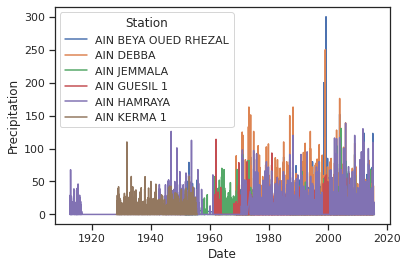

In [3]:
import seaborn as sns
data=df[:100000]
sns.set(style="ticks", color_codes=True)
sns.lineplot(data=data,x="Date",y="Precipitation",hue="Station")

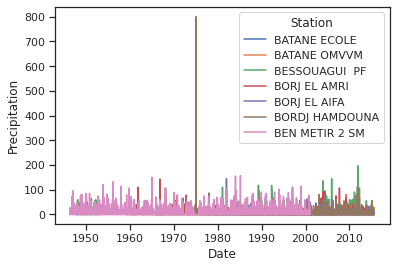

In [4]:
data1=df[400000:500000]

sns.set(style="ticks", color_codes=True)
sns.lineplot(data=data1,x="Date",y="Precipitation",hue="Station")

ajout de model gumbel pour la distrubition 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


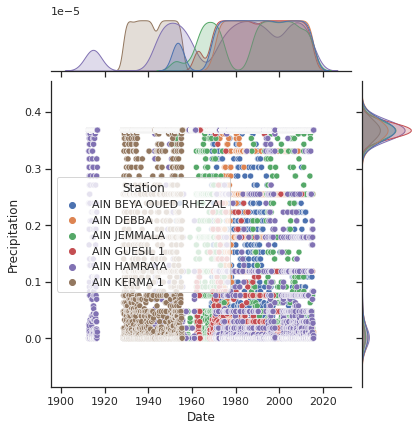

In [21]:
import scipy.stats as stats
import tensorflow_probability as tfp
data2=df[:100000]
dist = tfp.distributions.Gumbel(loc=0., scale=1.)
data2["Precipitation"]=dist.prob(data2["Precipitation"])
sns.jointplot(data=data2,x="Date",y="Precipitation",hue="Station")

